In [238]:
%matplotlib inline
import pickle
from nltk.tokenize import word_tokenize, wordpunct_tokenize, WhitespaceTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import DBSCAN, KMeans
from gensim import corpora, models, similarities, matutils
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
import itertools
import copy
from scipy.spatial.distance import pdist, squareform

import seaborn as sns
sns.set(font_scale=1.4, style='white')


In [2]:
with open('data/clean_script20180821.pkl', 'rb') as f:
      movie_meta = pickle.load(f)

Remove 'Pretty Woman' which is a duplicate and use the final version instead

In [13]:
movie_meta1=[]
for movie in movie_meta:m
    if movie['title'] == 'Pretty Woman Script':
        continue
    if movie['title'] == 'Pretty Woman (final script) Script':
        movie['title'] ='Pretty Woman Script'
    movie_meta1.append(movie)

In [16]:
movie_meta=copy.deepcopy(movie_meta1)
del movie_meta1

Get all the character's from the movie, which will be used as stop word

In [74]:
#files I used for analyze characters
with open('data/movie_meta_top5_4lines_0820.pkl', 'rb') as f:
    movie_char = pickle.load(f)

In [75]:
#Again, remove 'Pretty Woman' and use the final version instead
movie_char1=[]
for movie in movie_char:
    if movie['title'] == 'Pretty Woman Script':
        continue
    if movie['title'] == 'Pretty Woman (final script) Script':
        movie['title'] ='Pretty Woman Script'
    movie_char1.append(movie)

In [77]:
characters = []
for movie in movie_char1:
    char = {}
    char['title'] = movie['title']
    char['chars'] = [key for key in movie['script_by_char'].keys() if key != 'head']
    characters.append(char)

In [78]:
movie_char_df = pd.DataFrame(characters)

In [80]:
df = pd.DataFrame(movie_meta)

In [81]:
df = pd.merge(df, movie_char_df, on='title', how='left')

In [82]:
df[df['chars'].isnull()]

,clean_script,genre,month,rating,release_time,script_url,scripts,title,year,chars
643,the mask\n \n \n \n...,"[Actio, Comedy, Crim, Drama, Fantasy, Romanc]",July,NaN,July 1994,"/scripts/Mask,-The.html",\n \n \n ...,"Mask, The Script",1994,NaN
866,silver linings playbook\r\n\r\n \r\n...,"[Comedy, Drama, Romanc]",December,8.94,December 2012,/scripts/Silver-Linings-Playbook.html,\r\n\r\n \r\n SILVER L...,Silver Linings Playbook Script,2012,NaN


In [42]:
# create common stopword
common_names = list(itertools.chain.from_iterable(df['chars'].dropna()))
sw = stopwords.words('english')
sw = sw + common_names

sw.extend(['dr', 'de', 'san', 'looks', 'going', 'dr', 'mrs', 'mr', 'uh', 'huh', 'miss', 
                     'ya',  'lt',  'got', 'guys', 'gov', 'st', 'misery', 
                    'ring',  'lung', 'mirror', 'sir',  'thou',  'st',  'x',
           'gonna', 'cannot', 'gotta', 'new'])
sw.extend(['ok', 'yeah', 'phone', 'hi', 'cu', 'um', 'wanna', 'okay', 'guy', 'em' , 'shall', 'toward', 'oh', 'actually',
          'glance', 'towards', 'sr', 'pat'])

sw.extend(['shot', 'scene', 'camera', 'film',' really', 'screen', 'cont', 'cu', 'closeup', 'pov', 'thru', 'omit'])

In [47]:
lemmatizer = WordNetLemmatizer()
def lemmatize_and_tag(row):
    text = row['clean_script']
    try:
        for char in row['chars']:
            text = text.replace(char, '')
    except:
        print('no char')
    words=[]
    for w, p  in pos_tag(wordpunct_tokenize(text)):
        w = w.strip('1234567890"')
        if w in sw or not w:
            continue
        if p in pos_to_wornet_dict.keys():
            words.append(lemmatizer.lemmatize(w, pos_to_wornet_dict[p]))
    print(row['title'])
    return ' '.join(words)

pos_to_wornet_dict = {

    'JJ': 'a',
    'JJR': 'a',
    'JJS': 'a',
    'RB': 'r',
    'RBR': 'r',
    'RBS': 'r',
    'NN': 'n',
    'NNP': 'n',
    'NNS': 'n',
    'NNPS': 'n',
    'VB': 'v',
    'VBG': 'v',
    'VBD': 'v',
    'VBN': 'v',
    'VBP': 'v',
    'VBZ': 'v',

}

In [84]:
df['lemmatized_tag_selected_script'] = df.apply(lemmatize_and_tag, axis=1)

10 Things I Hate About You Script
12 Script
12 and Holding Script
12 Monkeys Script
12 Years a Slave Script
127 Hours Script
1492: Conquest of Paradise Script
15 Minutes Script
17 Again Script
187 Script
2012 Script
30 Minutes or Less Script
42 Script
44 Inch Chest Script
48 Hrs. Script
50-50 Script
500 Days of Summer Script
8MM Script
A Few Good Men Script
A Most Violent Year Script
A Serious Man Script
Above the Law Script
Absolute Power Script
Abyss, The Script
Adjustment Bureau, The Script
Adventures of Buckaroo Banzai Across the Eighth Dimension, The Script
Affliction Script
After School Special Script
After.Life Script
Agnes of God Script
Air Force One Script
Airplane Script
Airplane 2: The Sequel Script
Aladdin Script
Ali Script
Alien Script
Alien 3 Script
Alien Nation Script
Alien vs. Predator Script
Alien: Resurrection Script
Aliens Script
All About Eve Script
All About Steve Script
All the King's Men Script
All the President's Men Script
Almost Famous Script
Alone in the Dark

Fracture Script
Frances Script
Frankenstein Script
Frankenweenie Script
Freaked Script
Freddy vs. Jason Script
French Connection, The Script
Frequency Script
Friday the 13th Script
Friday the 13th Part VIII: Jason Takes Manhattan Script
Fright Night Script
Fright Night (1985) Script
From Dusk Till Dawn Script
From Here to Eternity Script
Frozen (Disney) Script
Frozen River Script
Fruitvale Station Script
Fugitive, The Script
Funny People Script
G.I. Jane Script
G.I. Joe: The Rise of Cobra Script
Game 6 Script
Gamer Script
Gandhi Script
Gang Related Script
Gangs of New York Script
Garden State Script
Gattaca Script
Get Carter Script
Get Low Script
Get on Up Script
Getaway, The Script
Ghost Script
Ghost and the Darkness, The Script
Ghost Rider Script
Ghost Ship Script
Ghost World Script
Ghostbusters Script
Ghostbusters 2 Script
Ginger Snaps Script
Girl with the Dragon Tattoo, The Script
Gladiator Script
Glengarry Glen Gross Script
Go Script
Godfather Script
Godfather Part II Script
Godfa

Pariah Script
Passion of Joan of Arc, The Script
Patriot, The Script
Paul Script
Pearl Harbor Script
Peeping Tom Script
Peggy Sue Got Married Script
Perfect Creature Script
Perfect World, A Script
Perks of Being a Wallflower, The Script
Pet Sematary Script
Pet Sematary II Script
Petulia Script
Philadelphia Script
Phone Booth Script
Pi Script
Pianist, The Script
Piano, The Script
Pineapple Express Script
Pirates of the Caribbean Script
Pirates of the Caribbean: Dead Man's Chest Script
Pitch Black Script
Planet of the Apes, The Script
Platinum Blonde Script
Platoon Script
Pleasantville Script
Point Break Script
Postman, The Script
Power of One, The Script
Precious Script
Predator Script
Pretty Woman Script
Pride and Prejudice Script
Priest Script
Princess Bride, The Script
Private Life of Sherlock Holmes, The Script
Producer, The Script
Program, The Script
Prom Night Script
Prometheus Script
Prophecy, The Script
Proposal, The Script
Psycho Script
Public Enemies Script
Pulp Fiction Script

In [115]:
#save the dataframe
with open('data/df_plot_lemmatized_final.pkl', 'wb') as f:
    pickle.dump(df, f)

Transform the text into vectors using TFIDFVectorizer

In [85]:
tag_tfidf = TfidfVectorizer(stop_words=sw, min_df=0.1, max_df=0.9)
tag_tfidf_vec = tag_tfidf.fit_transform(df['lemmatized_tag_selected_script'])

Save the tfidf model for the recommendation system given text input.

In [256]:
with open('model/tfidf.pkl', 'wb') as f:
    pickle.dump(tag_tfidf, f)

In [86]:
word_list = np.array(tag_tfidf.get_feature_names())
len(word_list)

4605

Using NMF to get topics

In [87]:
tag_nmf = NMF(n_components=18)
tag_nmf_topic_vec = tag_nmf.fit_transform(tag_tfidf_vec)

In [88]:
tag_nmf_word_vec = tag_nmf.components_
tag_nmf_word_top10 = np.argsort(tag_nmf_word_vec, axis = 1)[:, -1:-11:-1]

In [409]:
for i in range (len(tag_nmf_word_top10)):
    key_word = ', '.join(word_list[tag_nmf_word_top10[i]])
    print(i, key_word)

0 blood, tree, corridor, human, gaze, spin, skin, wind, flame, edge
1 soldier, general, sergeant, army, war, lieutenant, rifle, major, officer, prisoner
2 gun, bullet, weapon, security, pistol, police, thug, building, elevator, alley
3 officer, police, tv, radio, patient, hospital, doctor, reporter, father, monitor
4 ship, data, planet, crew, computer, control, space, console, pilot, deck
5 fuck, shit, money, alright, bitch, jesus, motherfucker, asshole, gun, brother
6 sword, dragon, warrior, battle, merry, arrow, forest, tree, blood, armor
7 baby, wedding, party, date, sex, marry, wow, thanks, happy, dog
8 agent, fbi, computer, monitor, security, tank, federal, surveillance, tech, pilot
9 mother, father, sister, doctor, family, brother, aunt, daughter, son, wife
10 lawyer, office, desk, attorney, court, jury, client, file, case, money
11 president, plane, general, pilot, missile, secretary, aide, professor, war, tv
12 stage, audience, movie, actor, theater, script, music, crowd, direc

Save the NMF model from the recommdation system given text input

In [320]:
result = (tag_nmf_topic_vec, tag_nmf, tag_nmf_word_vec)
with open('final_result/nmf_model.pkl', 'wb') as f:
    pickle.dump(result, f)

In [498]:
movie_topic = tag_nmf_topic_vec.argmax(axis=1)
df_res=pd.Series(movie_topic).value_counts()

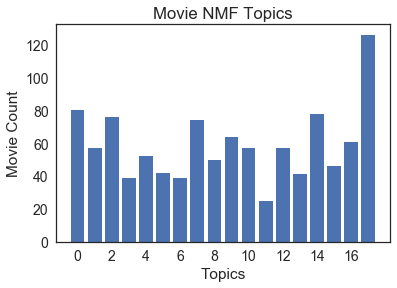

In [499]:
plt.bar(range(len(df_res)),df_res.sort_index())
plt.ylabel('Movie Count')
plt.xticks(range(0,18,2), range(0,18,2) )
plt.xlabel('Topics')
plt.title('Movie NMF Topics')

To get movies close to each other, use KMeans Clustering.

Run Silhouette plot to determine cluster number 

In [174]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 13 The average silhouette_score is : 0.1682245438561652
For n_clusters = 14 The average silhouette_score is : 0.1789032265469316
For n_clusters = 15 The average silhouette_score is : 0.18920743641304894
For n_clusters = 16 The average silhouette_score is : 0.1898993551789078
For n_clusters = 17 The average silhouette_score is : 0.18809794246329037
For n_clusters = 18 The average silhouette_score is : 0.19573681088821362
For n_clusters = 19 The average silhouette_score is : 0.18893653098268445
For n_clusters = 20 The average silhouette_score is : 0.18224791919165195


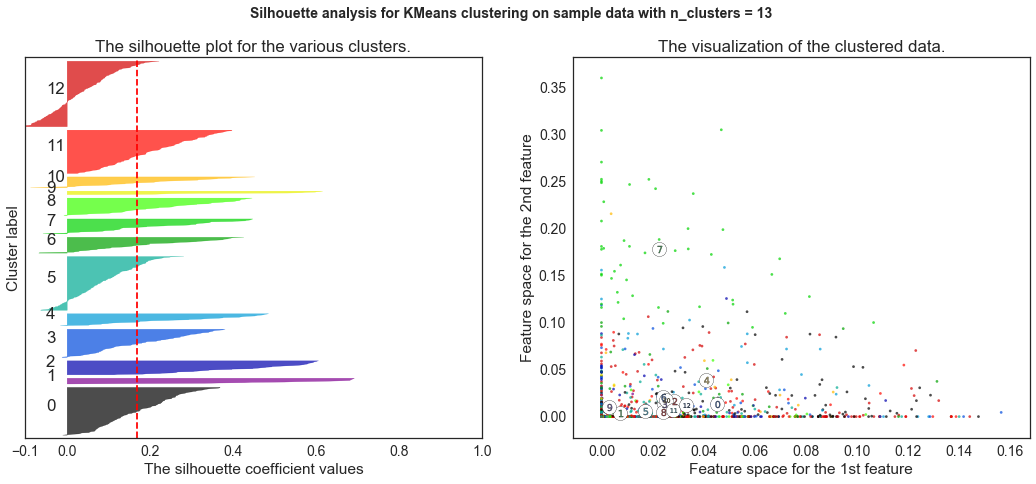

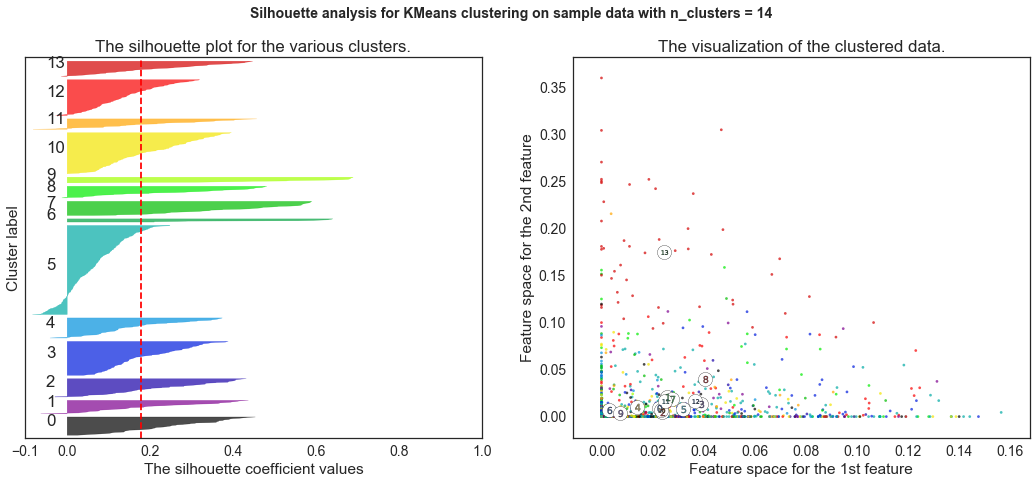

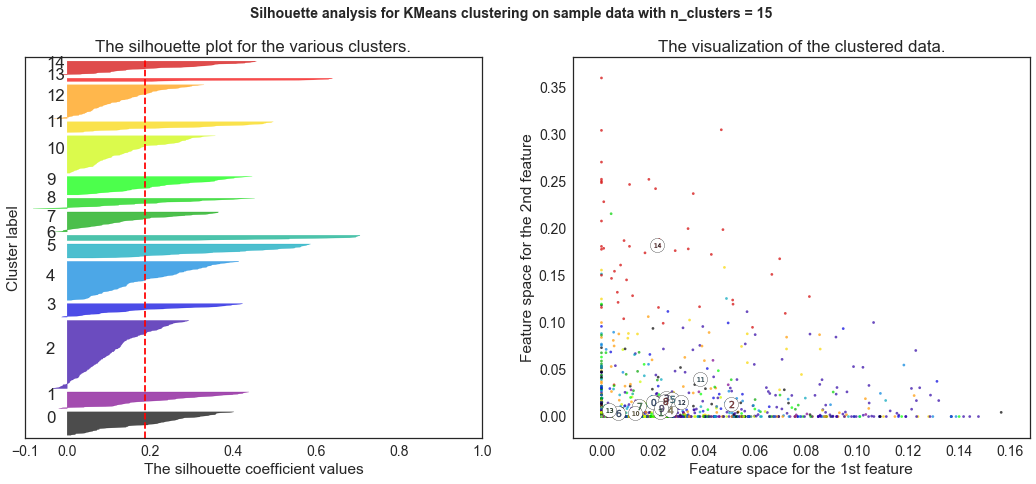

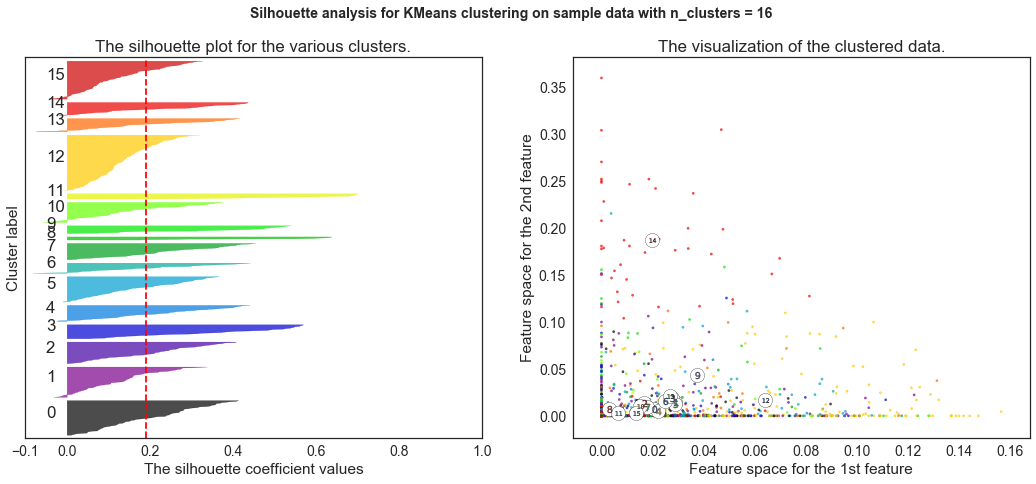

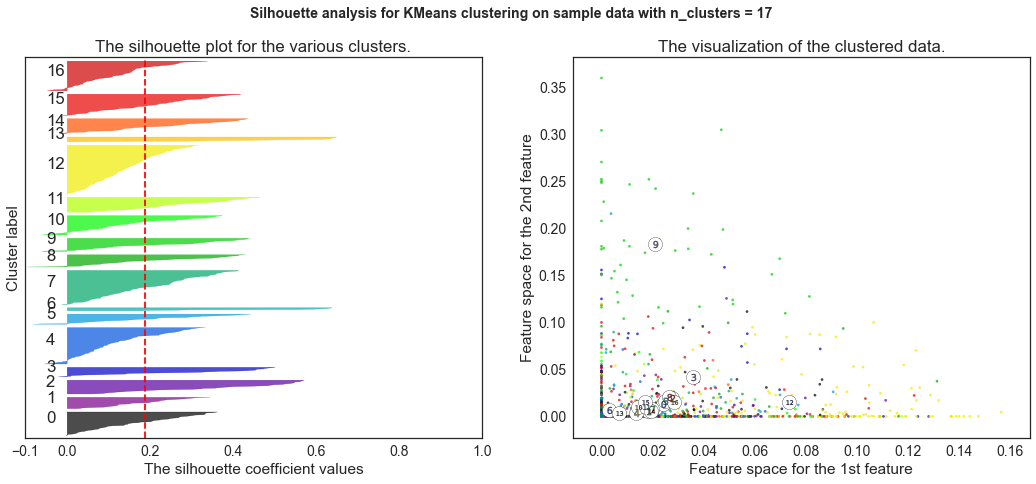

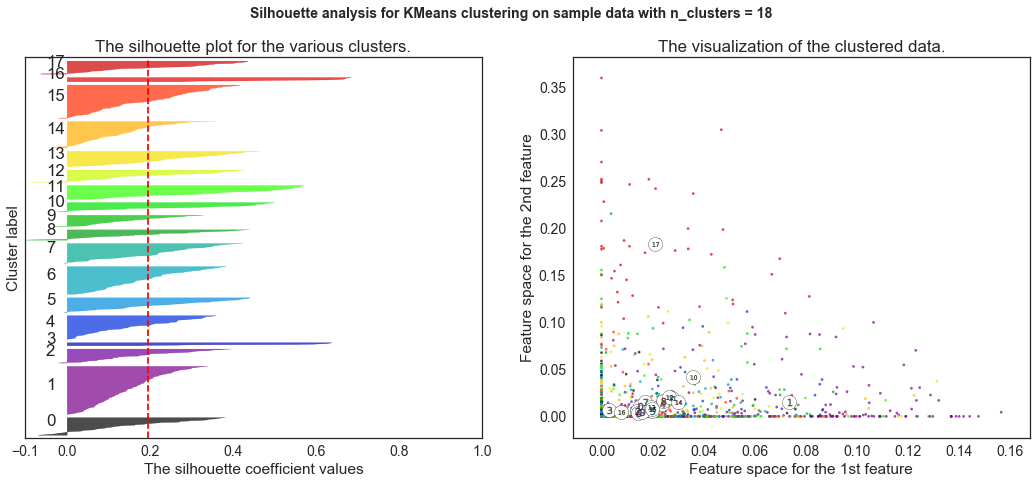

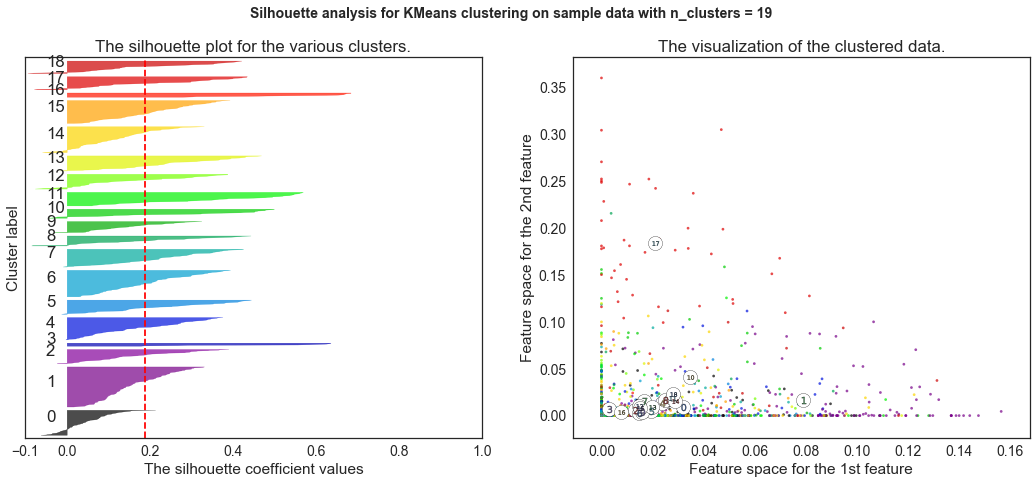

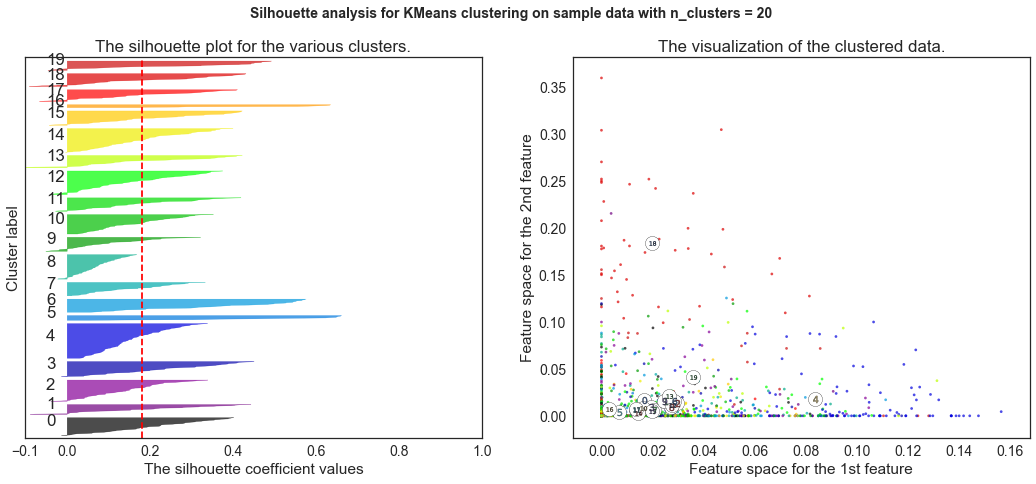

In [176]:
X= tag_nmf_topic_vec

range_n_clusters = [ 13, 14, 15, 16, 17, 18, 19, 20,]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

Use 18 clusters

In [529]:
kmeans = KMeans(18)
kmeans_vec = kmeans.fit_transform(tag_nmf_topic_vec)

In [530]:
kmeans_res = kmeans.labels_
df_res = pd.Series(kmeans_res)
df_res.index = df['title']
df_res = df_res.reset_index()
df_res[0].value_counts()

1     124
16    112
10     86
3      85
12     84
13     83
17     67
2      54
6      52
0      49
5      48
4      45
14     45
9      42
11     34
8      26
7      17
15     11
Name: 0, dtype: int64

Plot classification using t-SNE

In [113]:
from sklearn.manifold import TSNE

In [181]:
tsne = TSNE(random_state=42)
tsne_res = tsne.fit_transform(tag_nmf_topic_vec)

In [531]:
tsne_label = np.concatenate([tsne_res, kmeans_res.reshape(1064,1)], axis=1)

tsne_label_df = pd.DataFrame(tsne_label, columns=['d1', 'd2', 'cluster'])

tsne_label_df['old_title'] = df['title']

tsne_label_df.sort_values('cluster', inplace=True)

In [486]:
def fix_name(old_name):
    return re.sub('(, The)? Script$', '', old_name)

In [532]:
tsne_label_df['title']=tsne_label_df['old_title'].apply(fix_name)

In [533]:
tsne_label_df.head()

,d1,d2,cluster,old_title,title
842,-6.399259,15.896159,0.0,Serial Mom Script,Serial Mom
1008,1.379233,22.847427,0.0,"Verdict, The Script",Verdict
202,-9.551950,14.067136,0.0,Capote Script,Capote
475,-1.245599,17.669525,0.0,His Girl Friday Script,His Girl Friday
44,-1.532656,20.209345,0.0,All the President's Men Script,All the President's Men


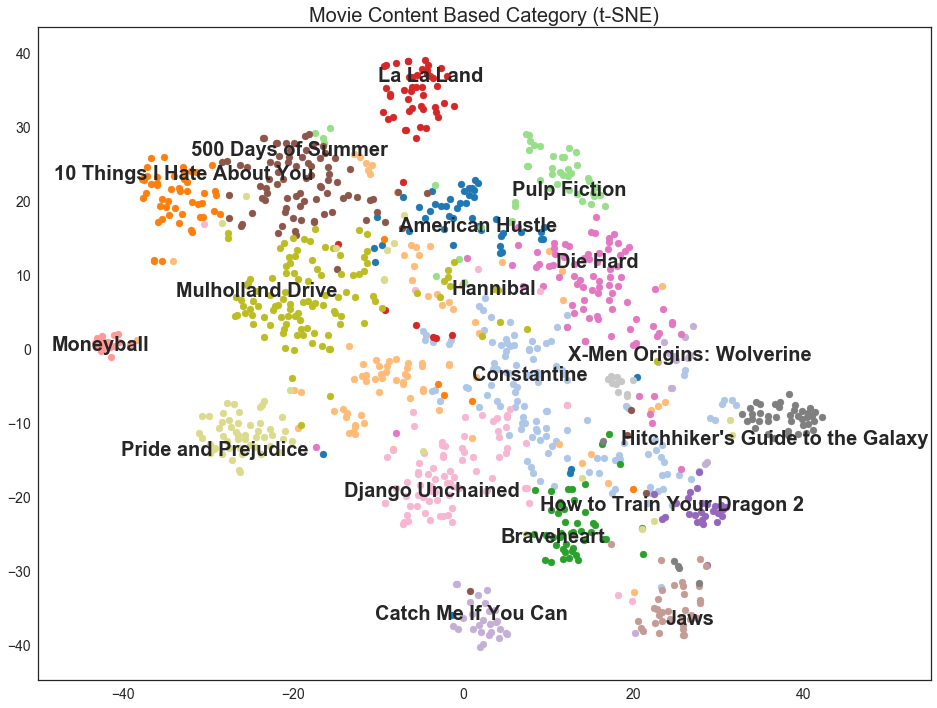

In [534]:
color_list = plt.cm.tab20
plt.figure(figsize=(16,12))
for c, group in tsne_label_df.groupby('cluster'):
    plt.scatter(group['d1'], group['d2'], color=color_list.colors[int(c)], label=str(int(c)))
    
film=[0,489,1055, 477,303, 16,535,52,298,179,674,208,568, 685, 776, 245, 764, 447]
for f in film:
    plt.text(tsne_label_df.loc[f,'d1'], tsne_label_df.loc[f,'d2'], tsne_label_df.loc[f,'title'],
         horizontalalignment='center', verticalalignment='center', 
             fontdict={'weight':'bold','fontsize': 20})
plt.xlim(-50,55)
plt.title('Movie Content Based Category (t-SNE)', fontsize=20)

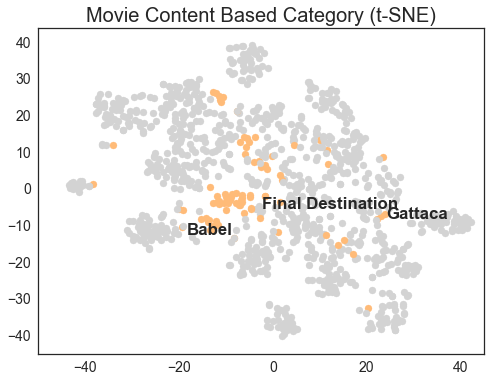

In [538]:
color_list = plt.cm.tab20
plt.figure(figsize=(8,6))
for c, group in tsne_label_df.groupby('cluster'):
    if int(c) == 3:
        plt.scatter(group['d1'], group['d2'], color=color_list.colors[int(c)], label=str(int(c)))
    else:
        plt.scatter(group['d1'], group['d2'], color='lightgrey', label=str(int(c)))
    
film=[401,363, 101]
for f in film:
    plt.text(tsne_label_df.loc[f,'d1'], tsne_label_df.loc[f,'d2'], tsne_label_df.loc[f,'title'],
         horizontalalignment='center', verticalalignment='center', fontdict={'weight':'bold'})
plt.xlim(-50,45)
plt.title('Movie Content Based Category (t-SNE)', fontsize=20)

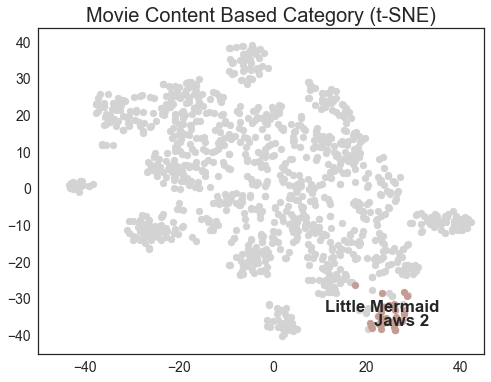

In [537]:
color_list = plt.cm.tab20
plt.figure(figsize=(8,6))
for c, group in tsne_label_df.groupby('cluster'):
    if int(c) == 11:
        plt.scatter(group['d1'], group['d2'], color=color_list.colors[int(c)], label=str(int(c)))
    else:
        plt.scatter(group['d1'], group['d2'], color='lightgrey', label=str(int(c)))
    
film=[536,600]
for f in film:
    plt.text(tsne_label_df.loc[f,'d1'], tsne_label_df.loc[f,'d2'], tsne_label_df.loc[f,'title'],
         horizontalalignment='center', verticalalignment='center', fontdict={'weight':'bold'})
plt.xlim(-50,45)
plt.title('Movie Content Based Category (t-SNE)', fontsize=20)

In [535]:
tsne_label_df.to_csv('data/tsne_df1.csv')

Add genre info for recommendation system

In [222]:
def clean_genre(x):
    res = []
    for g in x:
        g=g.strip()
        genres = g.split('.')
        for x in genres:
            if x.strip()=='Actio':
                x='Action'
            elif x.strip()=='Horro':
                x='Horror'
            elif x.strip() == 'Music':
                x='Musical'
            res.append(x)
    return '|'.join(res)

In [223]:
genre_dummy = df['genre'].apply(clean_genre).str.get_dummies()

Compare within cluster/genre SSE

In [225]:
genre_dummy.index = df['title']

In [421]:
genre_dummy.rename(columns={'Animatio':'Animation', 'Adventu':'Adventure', 'Crim': 'Crime',
                           'Romanc': 'Romance', 'Film-Noi': 'Film-Noir', 'Wa':'War'}, inplace=True)

In [422]:
genre_dummy.head(2)

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thrill,War,West
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You Script,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12 Script,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
def get_inertia(topic_vec):
    centroid = np.mean(topic_vec, axis=0)
    return np.linalg.norm((topic_vec - centroid), axis=1)

In [423]:
genre1 = genre_dummy.copy()
genre1.reset_index(inplace=True)
genre1.columns

Index(['title', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thrill',
       'War', 'West'],
      dtype='object')

In [541]:
cluster_inertia = []
cluster_labels = []
for i, group in df_res.groupby(0):
    inertia = get_inertia(tag_nmf_topic_vec[df_res.index[df_res[0]==i]])
    cluster_inertia.append(inertia)
    cluster_labels.append('Cluster%d'%i)

genre_inertia = []
genre_labels = []
for g in ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy',  'History', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thrill','War', 'West']:
    inertia = get_inertia(tag_nmf_topic_vec[genre1.index[genre1[g]==1]])
    genre_inertia.append(inertia)
    genre_labels.append(g)

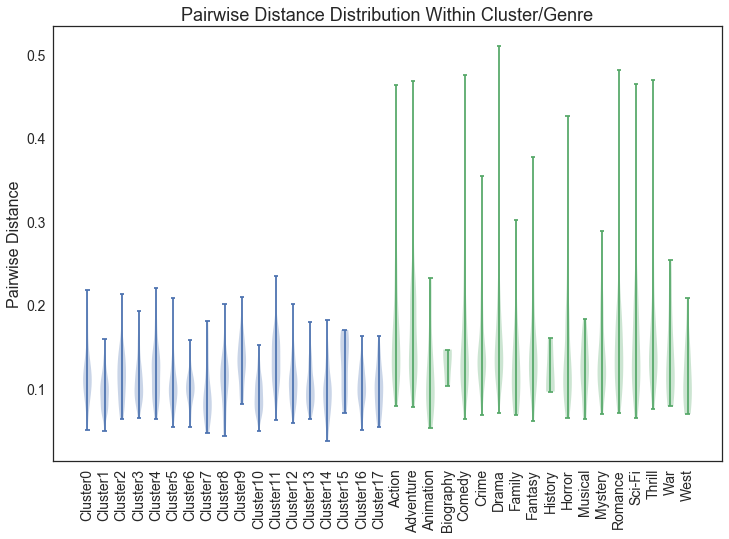

In [542]:
plt.figure(figsize=(12,8))
plt.violinplot(cluster_inertia, positions=range(len(cluster_inertia)))
plt.violinplot(genre_inertia, positions= range(len(cluster_inertia), len(cluster_inertia)+len(genre_inertia)))
plt.xticks(range(len(cluster_inertia)+len(genre_inertia)),cluster_labels+genre_labels, rotation=90)
plt.ylabel('Pairwise Distance', fontsize=16)
plt.title('Pairwise Distance Distribution Within Cluster/Genre', fontsize=18)
plt.savefig('visualization/pairwise_distribution.png')

Build Recommendation System using Euclidean Distance

In [240]:
combined_topic_vec = np.concatenate([tag_nmf_topic_vec, genre_dummy.values/15], axis=1)

In [241]:
genre_euclidean_table = squareform(pdist(combined_topic_vec, metric='euclidean'))
genre_euclidean_rank = genre_euclidean_table.argsort(axis=1)
genre_euclidean_df = pd.DataFrame(euclidean_table, index =df['title'], columns=df['title'])

In [243]:
recommendation_mv_df = pd.DataFrame(genre_euclidean_rank, index=df['title'])
recommendation_mv_df.drop(columns=0,inplace=True)

In [374]:
with open('model/topic_genre_matrix.pkl', 'wb') as f:
    pickle.dump(combined_topic_vec, f)

Clean up the recommendation table, eg. recomve 'script' after the title, change cases

In [246]:
def fix_name(old_name):
    return re.sub('(, The)? Script$', '', old_name)

In [247]:
recommendation_mv_df1 = recommendation_mv_df.copy()

recommendation_mv_df1.reset_index(inplace=True)
recommendation_mv_df1['title'] = recommendation_mv_df1['title'].apply(fix_name)

recommendation_mv_df1['title_lower'] = recommendation_mv_df1['title'].str.lower() 

recommendation_mv_df1.set_index('title', inplace=True)

In [248]:
recommendation_mv_df1.head()

,1,2,3,4,5,6,7,8,9,10,...,1055,1056,1057,1058,1059,1060,1061,1062,1063,title_lower
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,234,322,27,574,54,198,358,1037,178,738,...,450,1012,30,647,536,507,55,336,955,10 things i hate about you
12,1026,927,59,678,78,317,356,449,458,280,...,12,674,920,618,507,769,55,336,955,12
12 and Holding,722,760,183,732,1022,184,178,185,956,1052,...,360,30,1012,647,536,507,55,336,955,12 and holding
12 Monkeys,928,1062,90,195,401,212,938,718,561,991,...,839,796,507,618,769,536,336,55,955,12 monkeys
12 Years a Slave,973,668,230,560,683,785,43,329,132,781,...,360,618,769,647,507,536,55,336,955,12 years a slave


In [254]:
x='Jaws'
recommendation_mv_df1.index[recommendation_mv_df1.loc[recommendation_mv_df1['title_lower']==x.lower(), range(1,6)]]

Index([['Jaws 2', 'Mud', 'Hard Rain', 'Blood and Wine', 'Jurassic Park III']], dtype='object', name='title')

In [255]:
with open('model/recommendation_mv_df.pkl', 'wb') as f:
    pickle.dump(recommendation_mv_df1, f)

Can I take in a paragraph and recommend?


test

In [368]:
text = '''Ariel, a sixteen-year-old[12] mermaid princess, is dissatisfied with underwater life in the kingdom of Atlantica, and is fascinated by the human world. With her best friend Flounder, Ariel collects human artifacts in her grotto, and often goes to the surface of the ocean to visit Scuttle, a seagull who offers very inaccurate knowledge of human culture. She ignores the warnings of her father King Triton, the ruler of Atlantica, and Sebastian, a crab who serves as Triton's adviser and court composer, that contact between merpeople and humans is forbidden.

One night, Ariel, Flounder, and an unwilling Sebastian travel to the ocean surface to watch a celebration for the birthday of Prince Eric on a ship. Ariel instantly becomes enamored with Eric. The birthday celebration is cut short by a violent storm which wrecks the ship and tosses Eric overboard. Ariel rescues him and brings him to shore. She sings to him, but immediately leaves just as he regains consciousness to avoid being discovered. Fascinated by the memory of her voice, Eric vows to find who saved and sang to him, and Ariel vows to find a way to join him and his world. Noticing a change in Ariel's behavior, Triton questions Sebastian about her behavior and learns of her love for Eric. Triton confronts Ariel in her grotto, where she and Flounder store human artifacts, and destroys the objects with his trident. After Triton leaves, two eels named Flotsam and Jetsam convince Ariel to visit Ursula, an evil sea witch who is half-woman and half-octopus.

Ursula makes a deal with Ariel that the sea witch will transform Ariel into a human for three days. Within these three days, Ariel must receive the "kiss of true love" from Eric. If Ariel gets Eric to kiss her, she will remain a human permanently. Otherwise, she will turn back into a mermaid and belong to Ursula. As payment, Ariel must give up her voice. Ariel accepts and signs a contract, sealing the deal. Ursula places her voice inside a nautilus shell. Ariel is then given human legs and taken to the surface by Flounder and Sebastian. Eric finds Ariel on the beach and takes her to his castle, unaware that she is the one who had rescued him earlier. Ariel spends time with Eric, and at the end of the second day, they almost kiss, but are thwarted by Flotsam and Jetsam. Angered at Ariel's close success, Ursula disguises herself as a beautiful young woman named Vanessa and appears onshore singing with Ariel's voice. Eric recognizes the song and, in her disguise, Ursula casts a hypnotic enchantment on Eric to make him forget about Ariel.

The next day, Ariel discovers that Eric will be married to a beautiful young women named Vanessa, who looks similar to Ariel but with black hair. Eric assumes that Vanessa is the girl who saved him from drowning. Heartbroken at this depressing discovery, Ariel breaks down into tears, with Sebastian comforting her. While flying, Scuttle discovers that Vanessa is actually Ursula in disguise, and informs Ariel that Eric is marrying Ursula in disguise. Ariel immediately pursues the wedding barge, with Flounder carrying her across the sea tied to a barrel. Sebastian informs Triton of Ursula's actions, and Scuttle disrupts the wedding with the help of various animals. In the chaos, the nautilus shell around Ursula's neck is destroyed, restoring Ariel's voice and breaking Ursula's enchantment over Eric. Realizing that Ariel is the girl who saved his life, Eric rushes to kiss her, but the sun sets and Ariel transforms back into a mermaid. Ursula reveals herself and kidnaps Ariel. Triton furiously confronts Ursula and demands Ariel's release, but the deal is inviolable, due to Ariel signing the contract. Triton saves Ariel only by giving his trident to Ursula and taking her place as the witch's prisoner during the urging. Ariel is released as Triton transforms into a polyp and loses his authority over Atlantica. Ursula steps forward as the new queen, but before she can use the trident after Ariel furiously confronts her, Eric intervenes with a harpoon. Ursula attempts to destroy Eric with the trident, but Ariel intervenes, causing Ursula to inadvertently kill Flotsam and Jetsam. As Ariel hurries to join Eric, an enraged Ursula uses the trident to expand herself into monstrous proportions.

Ariel and Eric reunite on the surface just before Ursula grows past and towers over them. She then gains full control of the entire ocean, creating a storm and bringing sunken ships to the surface with a whirlpool. Ursula traps Ariel at the bottom of the whirlpool and shoots at her with the trident (with Ariel barely avoiding each blast). Just as Ursula is about to destroy Ariel with the trident, Eric steers one of the wrecked ships towards Ursula, impaling her with the ship's splintered bowsprit. With Ursula murdered, Triton and the other polyps in Ursula's garden revert to their original forms. Realizing that Ariel truly loves Eric, Triton willingly changes her from a mermaid into a human and approves her marriage to Eric. Ariel and Eric marry on a wedding ship, while Ariel bids Triton, Flounder, Sebastian, and Scuttle goodbye so she can live her new life with Eric. Now married, Eric and Ariel depart.'''

In [307]:
query_vector = tag_tfidf.transform([text]).toarray()

In [370]:
genre_vector = np.array([0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0])

In [360]:
genre_dummy.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crim',
       'Drama', 'Family', 'Fantasy', 'Film-Noi', 'History', 'Horror',
       'Musical', 'Mystery', 'Romanc', 'Sci-Fi', 'Short', 'Sport', 'Thrill',
       'Wa', 'West'],
      dtype='object')

In [371]:
def recommendation(text, genre, movie_matrix=movie_matrix):
    genre_vector = np.array(genre)
    query_vector = tag_tfidf.transform([text])
    nmf_res = tag_nmf.transform(query_vector)
    vec = np.append(nmf_res[0], genre_vector/15)
    dist = np.linalg.norm((movie_matrix - vec), axis=1)
    return np.argsort(dist)[:5]


In [373]:
recommendation_mv_df1.index[a]

Index(['Little Mermaid', 'Toy Story', 'Happy Feet', 'Aladdin', 'Airplane'], dtype='object', name='title')

In [369]:
genre_dummy[genre_dummy.index=='Little Mermaid, The Script']

,Action,Adventure,Animation,Biography,Comedy,Crim,Drama,Family,Fantasy,Film-Noi,...,Horror,Musical,Mystery,Romanc,Sci-Fi,Short,Sport,Thrill,Wa,West
title,,,,,,,,,,,,,,,,,,,,,
"Little Mermaid, The Script",0,0,1,0,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0


plot to see the cluster within a genre and genres within a cluster

In [543]:
df_res1=df_res.set_index('title')

In [544]:
movie_adventure=df_res1[genre_dummy['Adventure']==1]

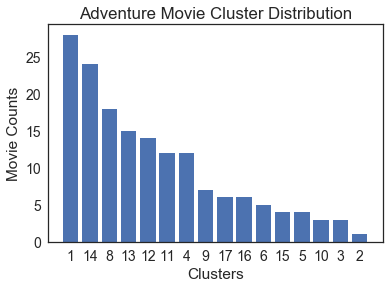

In [545]:
plt.bar(range(len(movie_adventure[0].value_counts())), movie_adventure[0].value_counts())
plt.xticks(range(len(movie_adventure[0].value_counts())), 
           movie_adventure[0].value_counts().index)
plt.xlabel('Clusters')
plt.ylabel('Movie Counts')
plt.title('Adventure Movie Cluster Distribution')
plt.savefig('presentation/adventure_movies.jpg')


In [546]:
cluster1=df_res.loc[df_res[0]==1, 'title']

cluster1_genre = genre_dummy[genre_dummy.index.isin(cluster1)]

cluter_1_dist = cluster1_genre.sum()

cluter_1_dist

Action       48
Adventure    28
Animation    13
Biography     0
Comedy       33
Crime        11
Drama        37
Family        8
Fantasy      23
Film-Noir     0
History       0
Horror       53
Musical       3
Mystery      20
Romance       6
Sci-Fi       39
Short         1
Sport         0
Thrill       58
War           0
West          1
dtype: int64

Text(0.5,1,'Movie Cluster 1 Genre Distribution')

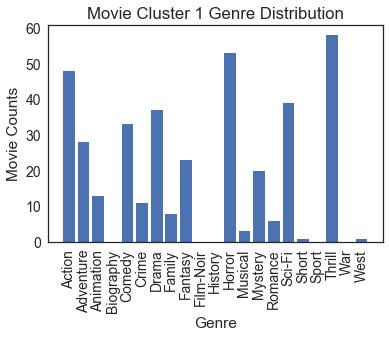

In [547]:
plt.bar(range(len(cluter_1_dist)), cluter_1_dist)
plt.xticks(range(len(cluter_1_dist)), 
           cluter_1_dist.index, rotation=90)
plt.xlabel('Genre')
plt.ylabel('Movie Counts')
plt.title('Movie Cluster 1 Genre Distribution')
